
# Определение перспективного тарифа для телеком компании

### ПЛАН:
#### [Описание проекта](#step1)
#### [Шаг 1. Файл с данными и общая информация](#step2)
#### [Шаг 2. Подготовка данных](#step3)
#### [2.1.Предобработка данных](#step4)
#### [2.2.Объединение таблиц](#step5)
#### [2.3.Расчет: звонки, интернет, сообщения, выручка](#step6)
#### [2.4. Выручка по каждому пользователю ](#step7)
#### [Шаг 3. Анализ данных](#step8)
#### [3.1.Минуты, сообщения, интернет](#step9)
#### [3.2.Дисперсия и стандартное отклонение. Гистограммы. Опиcание распределения](#step10)
#### [Шаг 4. Проверка гипотезы](#step11)
#### [4.1.Гипотеза_1](#step12)
#### [4.2.Гипотеза_2](#step13)
#### [Шаг 5. Общий вывод](#step14)

### Описание проекта <a id='step1'></a>
Два тарифных плана компании — федерального оператора сотовой связи: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходим предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. ***Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.***

Информация о тарифах  ниже.

Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей
Обратите внимание: компания всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### Шаг 1. Файл с данными и общая информация<a id='step2'></a>

In [1]:
import pandas as pd #загрузка библиотек
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
calls = pd.read_csv('/datasets/calls.csv') #путь к файлам
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

### Шаг 2. Подготовка данных <a id='step3'></a>
<br>Приведение данных к нужным типам;
<br>Нахождение и исправление ошибок в данных.
<br>Пояснение по ошибкам и  их исправление. 

<br>Расчет для каждого пользователя:
<br>-количество сделанных звонков и израсходованных минут разговора по месяцам;
<br>-количество отправленных сообщений по месяцам;
<br>-объем израсходованного интернет-трафика по месяцам;
<br>-помесячная выручка с каждого пользователя (суммарное количество звонков, сообщений и интернет-трафика минус бесплатный лимит; остаток умножается на значение из тарифного плана; прибавляется абонентская плата, соответствующая тарифному плану).

### 2.1. Предобработка данных <a id='step4'></a>

####  Calls

In [3]:
calls.head(7) #отображения перечня строк для просмотра

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000


In [4]:
calls['duration'].value_counts() ##проверка столбца по кол-ву нулевых значений 

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

Около 20%  звонков c длительностью - 0.0 минут по столбцу 'duration'- звонки зафиксированы (возможны  и пропущенные звонки и сбои в системе билинга) - оставляем и меняем их значение на 1минуту  и по всем минутам выборки - округление в большую сторону- np.ceil

In [5]:
calls['duration'] = calls['duration'].apply(np.ceil).replace(0, 1) #замена нулевых значений звонков на "1 минута" и округление

In [6]:
calls.info() #проверка типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
#замена типа данных с object на формат даты

In [8]:
calls['month'] = calls['call_date'].dt.month 
# вынесение в отдельный столбец месяца (дата звонка)

In [9]:
calls['calls_count'] = calls['duration'] 
#создание столбца по кол-ву звонков

In [10]:
calls['calls_count'] = calls['calls_count'].fillna(1)
#заполнение пропущенных значений на 1 (мин.)

In [11]:
calls_pivot_table = calls.pivot_table(index = ['user_id', 'month'], aggfunc={'duration': 'sum', 'calls_count': 'count'})
# сводная тадлица по'user_id', 'month'

In [12]:
calls_pivot_table.head(7) 

calls_count  duration
user_id month                       
1000    5               22     164.0
        6               43     187.0
        7               47     346.0
        8               52     418.0
        9               58     478.0
        10              57     363.0
        11              43     344.0

#### Internet

In [13]:
internet.head(7) 

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000


In [14]:
internet.drop(['Unnamed: 0'], axis='columns', inplace=True) #удаление дублирующего столбца- Unnamed: 0

13% нулевых значений по столбцу 'mb_used'- произведены действия (замена на "1" и округление) аналогичные 'duration' (calls)

In [15]:
internet['mb_used'].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

In [16]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil).replace(0, 1)

In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [18]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [19]:
internet['month'] = internet['session_date'].dt.month

In [20]:
internet_pivot_table = internet.pivot_table(index = ['user_id', 'month'], values='mb_used', aggfunc='sum')

In [21]:
internet_pivot_table.head(7)

mb_used
user_id month         
1000    5       2257.0
        6      23262.0
        7      14017.0
        8      14072.0
        9      14583.0
        10     14717.0
        11     14769.0

#### Messages

In [22]:
messages.head(7)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000


In [23]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [24]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

In [25]:
messages['month'] = messages['message_date'].dt.month

In [26]:
messages_pivot_table = messages.pivot_table(index = ['user_id', 'month'], values=['message_date'], aggfunc='count')

In [27]:
messages_pivot_table.head(7)

message_date
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57
        10               73
        11               58

#### Users

In [28]:
users.head(7)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart


In [29]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Выборка на 92% состоит из действующих тарифов (оценка столбца 'churn_date').

Для последующего анализа производим обработку данных по столбцам 'city' и 'tariff' с добавлением доп.столбцов: Москва/ регион- '1'/'0', ultra/smart- '1'/'0'.

In [30]:
users['city'].unique() #перечень всех город по выборке

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

###### Допущение: Все города кроме Москвы считаются по выборке регионами, в тч 3 города Московской области- их незначительное количество- 7 строк.

In [31]:
def city_tipe(row):
    """цикл для установления категории данных: Москва/ регион, добавлен столбец 'city_tipe'."""
    city = row['city']
    if city == 'Москва':
        return 1
    return 0
users['city_tipe'] = users.apply(city_tipe, axis = 1)  

In [32]:
def tariff_tipe(row):
    """цикл для установления категории данных: smart/ ultra, добавлен столбец 'tariff_tipe'."""
    tariff = row['tariff']
    if tariff == 'smart':
        return 0
    return 1
users['tariff_tipe'] = users.apply(tariff_tipe, axis = 1)  

In [33]:
users.head(7)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,city_tipe,tariff_tipe
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,1,0
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0,0
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1,1
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,0,1
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,0,0
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,0,0


In [34]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

In [35]:
users['churn_date'] = users['churn_date'].fillna(0)

In [36]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

In [37]:
users['month_reg'] = users['reg_date'].dt.month

In [38]:
users_pivot_table = users.pivot_table(index = ['user_id'], values= ['month_reg','city_tipe','tariff_tipe'])

In [39]:
users_pivot_table.head(7)

,city_tipe,month_reg,tariff_tipe
user_id,,,
1000,0,5,1
1001,1,11,0
1002,0,6,0
1003,1,8,1
1004,0,5,1
1005,0,1,0
1006,0,2,0


#### Tariffs

In [40]:
tariffs.head(7)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Аналогичное добавление столбца 'tariff_tipe' и его кодирование, как в "Users"

In [41]:
def tariff_tipe(row): 
    """цикл для установления категории данных: Тариф smart-0/ Тариф uLtra-1, добавлен столбец 'tariff_tipe'."""
    tariff = row['tariff']
    if tariff == 'ultra':
        return 0
    return 1
tariffs['tariff_tipe'] = users.apply(tariff_tipe, axis = 1)    

In [42]:
del tariffs['tariff_name'] #удаление столбца названия тарифа

In [43]:
tariffs.head(7)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_tipe
0,50,15360,500,550,200,3,3,0
1,1000,30720,3000,1950,150,1,1,1


#### Вывод:  
По представленным 5 df проведена проверка данных, исправление зафиксированных ошибок, при необходимости- смена типов данных. Комментарии указаны по тексту.

### 2.2.Объединение таблиц <a id='step5'></a>

Для проведения корректного анализа перечень представленных df объединен в сводных таблицах по ['user_id','month'] с помощью методов merge, join

In [44]:
#применение метода merge для объединения таблиц
pre_total = pd.merge(
    calls_pivot_table,
    internet_pivot_table,
    on=['user_id','month'], 
    how='outer')

In [45]:
pre_total.head(7)

calls_count  duration  mb_used
user_id month                                
1000    5             22.0     164.0   2257.0
        6             43.0     187.0  23262.0
        7             47.0     346.0  14017.0
        8             52.0     418.0  14072.0
        9             58.0     478.0  14583.0
        10            57.0     363.0  14717.0
        11            43.0     344.0  14769.0

In [46]:
total = pd.merge(
    pre_total,
    messages_pivot_table,
    on=['user_id','month'], 
    how='outer')

In [47]:
total.head(7)

calls_count  duration  mb_used  message_date
user_id month                                              
1000    5             22.0     164.0   2257.0          22.0
        6             43.0     187.0  23262.0          60.0
        7             47.0     346.0  14017.0          75.0
        8             52.0     418.0  14072.0          81.0
        9             58.0     478.0  14583.0          57.0
        10            57.0     363.0  14717.0          73.0
        11            43.0     344.0  14769.0          58.0

#### Вывод:
Объединение 4 df наглядно представляет картину по действующим тарифам исходя из мульти-индекса [user_id, month].

### 2.3. Расчет: звонки, интернет, сообщения, выручка<a id='step6'></a>

Расчет для каждого пользователя:
<br>-количество сделанных звонков и израсходованных минут разговора по месяцам;
<br>-количество отправленных сообщений по месяцам;
<br>-объем израсходованного интернет-трафика по месяцам.

In [48]:
total_users=total.join(users_pivot_table,on=['user_id'],how='inner')
#применение метода join для объединения таблиц

По итогу преобразований в total_users_tariffs повторно появились пустые значения в незначительном количестве- проводим аналогичную замену на "1" (см. в предыдущем разделе) по столбцам 'duration', 'mb_used', 'message_date'.

In [49]:
total_users[['duration','calls_count', 'mb_used', 'message_date']] = total_users[['duration', 'calls_count', 'mb_used', 'message_date']].fillna(value=1) 
#заполнение пропущенных значений заменой на 1

По столбцам 'duration', 'mb_used', 'message_date',  'churn_date', 'city_tipe' замена типа данных на int64 

In [50]:
columns = ['duration', 'calls_count', 'mb_used', 'message_date']
for i in columns:
    total_users[i] = total_users[i].astype('int64') #замена типа данных с float64 на int64 

In [51]:
total_users.head(17) #Расшифровка: city_tipe~ 1-Москва, 0-регионы; tariff_tipe~ 1-ultra, 0-smart

calls_count  duration  mb_used  message_date  city_tipe  \
user_id month                                                            
1000    5               22       164     2257            22          0   
        6               43       187    23262            60          0   
        7               47       346    14017            75          0   
        8               52       418    14072            81          0   
        9               58       478    14583            57          0   
        10              57       363    14717            73          0   
        11              43       344    14769            58          0   
        12              46       341     9829            70          0   
1001    11              59       444    18460             1          1   
        12              63       430    14059             1          1   
1002    6               15       118    10878             4          0   
        7               26       219    17615            11          0   
        8               42       294    20357            13          0   
        9               36       217    16724             4          0   
        10              33       221    13913            10          0   
        11              32       250    18621            16          0   
        12              33       242    18147            12          0   

               month_reg  tariff_tipe  
user_id month                          
1000    5              5            1  
        6              5            1  
        7              5            1  
        8              5            1  
        9              5            1  
        10             5            1  
        11             5            1  
        12             5            1  
1001    11            11            0  
        12            11            0  
1002    6              6            0  
        7              6            0  
        8              6            0  
        9              6            0  
        10             6            0  
        11             6            0  
        12             6            0

In [52]:
#итог по 5df при использовании конструкции reset_index()
total_users_tariffs=total_users.reset_index().merge(tariffs,on=['tariff_tipe'],how='outer') 

In [53]:
total_users_tariffs.head(17)

,user_id,month,calls_count,duration,mb_used,message_date,city_tipe,month_reg,tariff_tipe,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,164,2257,22,0,5,1,1000,30720,3000,1950,150,1,1
1,1000,6,43,187,23262,60,0,5,1,1000,30720,3000,1950,150,1,1
2,1000,7,47,346,14017,75,0,5,1,1000,30720,3000,1950,150,1,1
3,1000,8,52,418,14072,81,0,5,1,1000,30720,3000,1950,150,1,1
4,1000,9,58,478,14583,57,0,5,1,1000,30720,3000,1950,150,1,1
5,1000,10,57,363,14717,73,0,5,1,1000,30720,3000,1950,150,1,1
6,1000,11,43,344,14769,58,0,5,1,1000,30720,3000,1950,150,1,1
7,1000,12,46,341,9829,70,0,5,1,1000,30720,3000,1950,150,1,1
8,1003,8,55,392,8572,37,1,8,1,1000,30720,3000,1950,150,1,1
9,1003,9,134,990,12479,91,1,8,1,1000,30720,3000,1950,150,1,1


#### Вывод: 
Сформированная сводная таблица пользователи-услуги из 5 df в количестве 3214 пунктов наглядно отражает средний порядок цифр по каждому user_id для дальнейших аналитик, построения гистограмм и подтверждения гипотез.

### 2.4. Выручка по каждому пользователю <a id='step7'></a>

Расчет помесячной выручки с каждого пользователя (суммарное количество звонков, сообщений и интернет-трафика минус бесплатный лимит; остаток умножается на значение из тарифного плана; прибавляется абонентская плата, соответствующая тарифному плану).

In [54]:
#расчет выручки по total_users_tariffs конструкцией np.where c добавлением столбца 'revenue'
total_users_tariffs['revenue'] = (total_users_tariffs['rub_monthly_fee'] + 
                    np.where(total_users_tariffs['duration']-total_users_tariffs['minutes_included']>0, (total_users_tariffs['duration']-total_users_tariffs['minutes_included'])*total_users_tariffs['rub_per_minute'], 0) + 
                    np.where(total_users_tariffs['message_date']-total_users_tariffs['messages_included']>0, (total_users_tariffs['message_date']-total_users_tariffs['messages_included'])*total_users_tariffs['rub_per_message'], 0) + 
                    np.where(total_users_tariffs['mb_used']-total_users_tariffs['mb_per_month_included']>0, ((total_users_tariffs['mb_used']-total_users_tariffs['mb_per_month_included'])/1024)*total_users_tariffs['rub_per_gb'], 0)
                   )

In [55]:
total_users_tariffs['revenue'] = total_users_tariffs['revenue'].astype('int64')

In [56]:
total_users_tariffs.head(17)

,user_id,month,calls_count,duration,mb_used,message_date,city_tipe,month_reg,tariff_tipe,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5,22,164,2257,22,0,5,1,1000,30720,3000,1950,150,1,1,1950
1,1000,6,43,187,23262,60,0,5,1,1000,30720,3000,1950,150,1,1,1950
2,1000,7,47,346,14017,75,0,5,1,1000,30720,3000,1950,150,1,1,1950
3,1000,8,52,418,14072,81,0,5,1,1000,30720,3000,1950,150,1,1,1950
4,1000,9,58,478,14583,57,0,5,1,1000,30720,3000,1950,150,1,1,1950
5,1000,10,57,363,14717,73,0,5,1,1000,30720,3000,1950,150,1,1,1950
6,1000,11,43,344,14769,58,0,5,1,1000,30720,3000,1950,150,1,1,1950
7,1000,12,46,341,9829,70,0,5,1,1000,30720,3000,1950,150,1,1,1950
8,1003,8,55,392,8572,37,1,8,1,1000,30720,3000,1950,150,1,1,1950
9,1003,9,134,990,12479,91,1,8,1,1000,30720,3000,1950,150,1,1,1950


In [57]:
total_users_tariffs['revenue'].describe()

count    3214.000000
mean     1499.175793
std       786.928393
min       550.000000
25%       713.250000
50%      1591.000000
75%      1950.000000
max      6768.000000
Name: revenue, dtype: float64

#### Вывод: 
Объединенная выборка с правками дополнена итоговым показателем "revenue" для осуществления анализа в следующих разделах. <br>'Revenue" в среднем по выборке 1499 рублей при соответствии порядку цифр значения по медиане 1591 рублей, "выбросы" не столь весомы.

### Шаг 3. Анализ данных <a id='step8'></a>
<br>Описание поведения клиентов оператора, исходя из выборки. 
<br>Количество минут разговора,  сообщений и объём интернет-трафика необходимое пользователям каждого тарифа в месяц. <br>Среднее количество, дисперсия и стандартное отклонение, гистограммы, распределение.

### 3.1. Минуты, сообщения, интернет<a id='step9'></a>

In [58]:
#таблицы по тарифам
smart = total_users_tariffs[total_users_tariffs['tariff_tipe'] == 0]
ultra = total_users_tariffs[total_users_tariffs['tariff_tipe'] == 1]

Исходя из выборки получается, что 70% составляют пользователи тарифа smart и 30% ultra.

In [59]:
smart[['calls_count','duration','mb_used', 'message_date', 'revenue']].describe().astype('int')

,calls_count,duration,mb_used,message_date,revenue
count,2229,2229,2229,2229,2229
mean,58,429,16237,33,1251
std,25,194,5879,28,797
min,1,1,1,1,550
25%,40,291,12662,10,553
50%,60,435,16540,28,987
75%,76,560,20078,51,1703
max,198,1471,38627,143,6768


Text(0.5, 1.01, 'Зависимость количества звонков-минут-интернета-сообщений-выручки в тарифе "Смарт"')

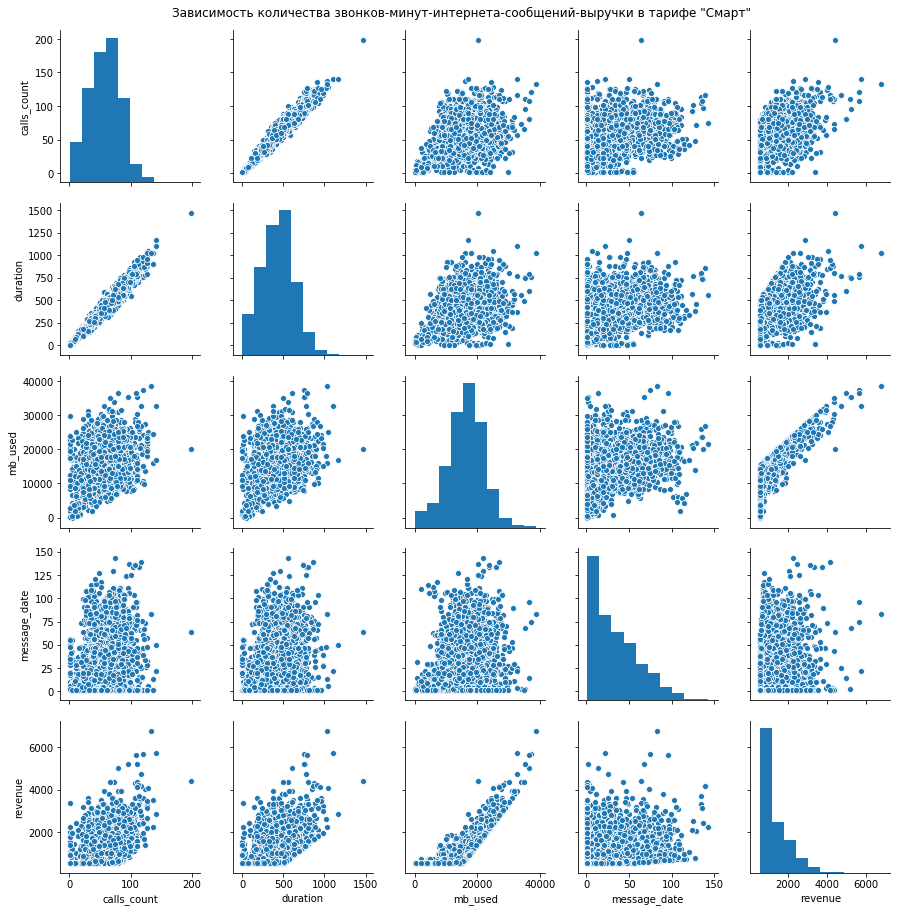

In [60]:
sns.pairplot(smart[['calls_count','duration','mb_used', 'message_date', 'revenue']])
plt.suptitle('Зависимость количества звонков-минут-интернета-сообщений-выручки в тарифе "Смарт"', y=1.01)

In [61]:
ultra[['calls_count','duration','mb_used', 'message_date', 'revenue']].describe().astype('int')

,calls_count,duration,mb_used,message_date,revenue
count,985,985,985,985,985
mean,73,540,19488,49,2060
std,43,325,10097,47,356
min,1,1,1,1,1950
25%,41,292,11787,6,1950
50%,74,532,19324,38,1950
75%,104,773,26866,79,1950
max,244,1727,49793,224,4743


Text(0.5, 1.01, 'Зависимость количества звонков-минут-интернета-сообщений-выручки в тарифе "Ультра"')

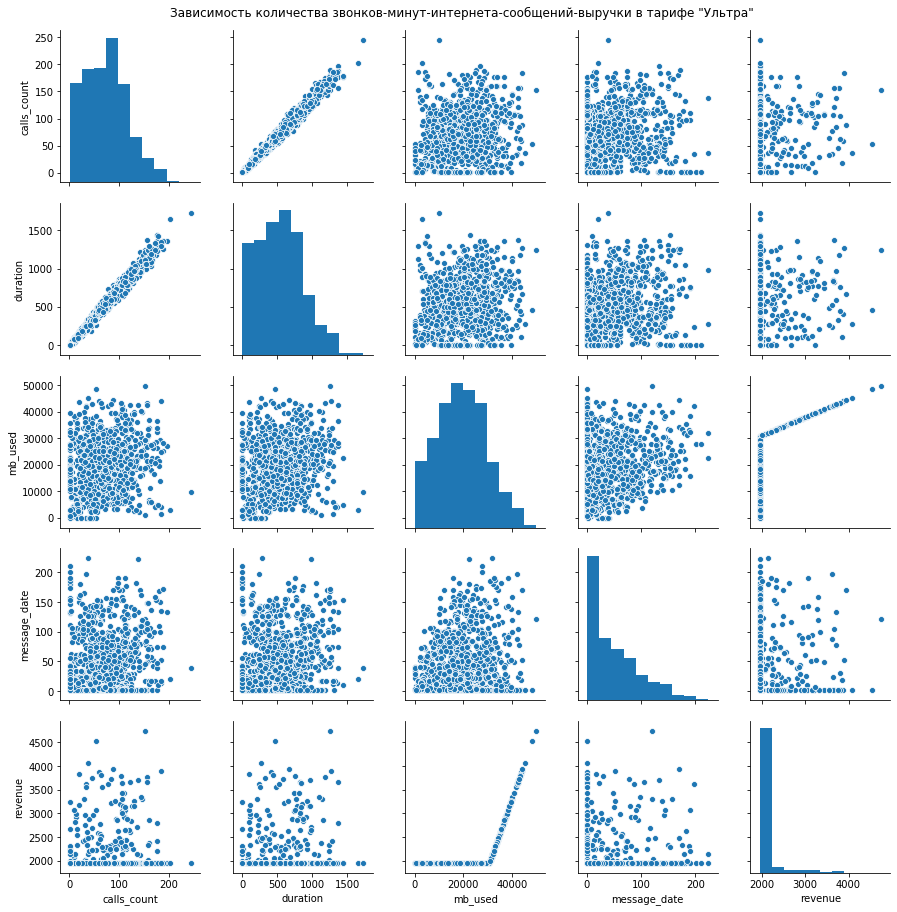

In [62]:
sns.pairplot(ultra[['calls_count','duration','mb_used', 'message_date', 'revenue']])
plt.suptitle('Зависимость количества звонков-минут-интернета-сообщений-выручки в тарифе "Ультра"', y=1.01)

### 3.2. Дисперсия и стандартное отклонение. Гистограммы. Опиcание распределения<a id='step10'></a>

In [63]:
#Дисперсия звонков
np.var_smart=smart.pivot_table(index='month',values=['calls_count','duration','mb_used', 'message_date', 'revenue'],aggfunc=(np.var)).astype('int')
print(np.var_smart)

       calls_count  duration   mb_used  message_date  revenue
month                                                        
1              433     25239  41660895           259   179278
2              644     38029  39151692           466   271097
3              652     38523  34072778           711   452946
4              660     36520  32571018           593   287042
5              643     36358  35851867           721   479040
6              569     32151  33639813           797   517898
7              606     33858  34887349           790   505657
8              634     36457  31384195           829   586078
9              624     35193  27079017           781   501153
10             639     37046  34443006           807   674785
11             614     33332  28610583           796   606549
12             717     41449  31165263           924  1057881


In [64]:
np.var_ultra=ultra.pivot_table(index='month',values=['calls_count','duration','mb_used', 'message_date', 'revenue'],aggfunc=(np.var)).astype('int')
print(np.var_ultra)

       calls_count  duration    mb_used  message_date  revenue
month                                                         
1             1733     78384   47223085           924        0
2             1678     92586  113532153           701     6120
3             2010    117100  120188971          1711    34924
4             1310     75233   94640345          1388    30666
5             1681     88397  101133044          1607   156444
6             1579     95618   86538929          1969    89210
7             1834     99550  101488522          2352   178407
8             1890    102933  109974029          2154   141895
9             1964    110778   90162535          2134    49153
10            2067    112144   96284088          2678   138435
11            1807    101301   98354660          2459   147758
12            2318    123586  107921385          2662   210433


##### Значения среднего и  ultra равны (все тарифы с выручкой по 1950 рублей), о чем свидетельствует np.var_ultra Января = 0.

In [65]:
ultra_1 = ultra.query('month == 1') #справочный срез выборки по ultra и Январю

In [66]:
#Стандартное отклонение звонков
np.std_smart=smart.pivot_table(index='month',values=['calls_count','duration','mb_used', 'message_date', 'revenue'],aggfunc=(np.std)).astype('int')
print(np.std_smart)

       calls_count  duration  mb_used  message_date  revenue
month                                                       
1               20       158     6454            16      423
2               25       195     6257            21      520
3               25       196     5837            26      673
4               25       191     5707            24      535
5               25       190     5987            26      692
6               23       179     5799            28      719
7               24       184     5906            28      711
8               25       190     5602            28      765
9               24       187     5203            27      707
10              25       192     5868            28      821
11              24       182     5348            28      778
12              26       203     5582            30     1028


In [67]:
np.std_ultra=ultra.pivot_table(index='month',values=['calls_count','duration','mb_used', 'message_date', 'revenue'],aggfunc=(np.std)).astype('int')
print(np.std_ultra)

       calls_count  duration  mb_used  message_date  revenue
month                                                       
1               41       279     6871            30        0
2               40       304    10655            26       78
3               44       342    10963            41      186
4               36       274     9728            37      175
5               41       297    10056            40      395
6               39       309     9302            44      298
7               42       315    10074            48      422
8               43       320    10486            46      376
9               44       332     9495            46      221
10              45       334     9812            51      372
11              42       318     9917            49      384
12              48       351    10388            51      458


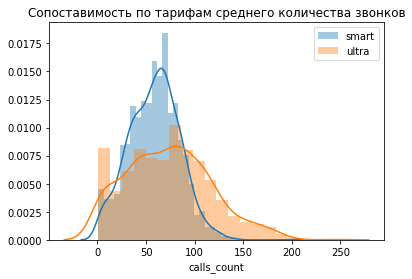

In [68]:
# Среднее по количеству звонков
sns.distplot(smart['calls_count'])
sns.distplot(ultra['calls_count'])
plt.title('Сопоставимость по тарифам среднего количества звонков')
plt.legend(['smart','ultra'])

По гистограмме количества звонков можно сделать вывод, что пользователи тарифа "Смарт" совершали по 60-80 звонков в среднем, пользователи тарифа "Ультра" уже закономерно больше исходя из условий тарифа- по 75-100 звонков.

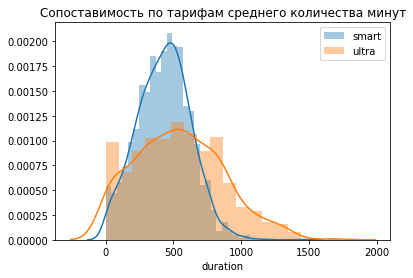

In [69]:
# Среднее по разговорам в минутах
sns.distplot(smart['duration'])
sns.distplot(ultra['duration'])
plt.title('Сопоставимость по тарифам среднего количества минут')
plt.legend(['smart','ultra'])

Гистограмма с разговорами в минутах пользователей тарифа "Смарт" отражает 500 минут в среднем, пользователи тарифа "Ультра" в диапазоне 500-750 минут. При заложенных в тарифные планы 500 минут и 3000 минут соответственно- половина пользователей "Ультра" не использует предложенный пакет минут полностью.

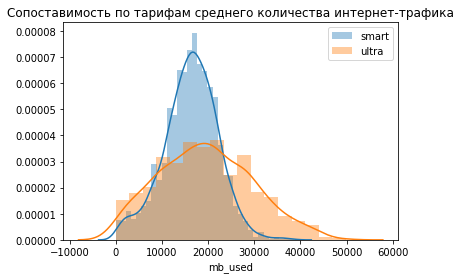

In [70]:
# Среднее по израсходованным Мб
sns.distplot(smart['mb_used'])
sns.distplot(ultra['mb_used'])
plt.title('Сопоставимость по тарифам среднего количества интернет-трафика')
plt.legend(['smart','ultra'])

Гистограмма по израсходованным Мб интернета пользователей тарифа "Смарт" отражает 15000 Мб в среднем, пользователи тарифа "Ультра" тратят около 15000-20000 Мб. При заложенных в тарифные планы в 15360 Мб и 30720 Мб соответственно- аналогично предоплаченным минутам в тарифе половина пользователей "Ультра" не использует предложенный пакет интернета полностью.

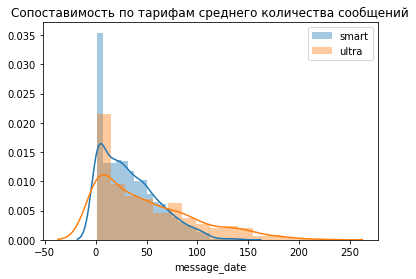

In [71]:
# Среднее по израсходованным сообщениям
sns.distplot(smart['message_date'])
sns.distplot(ultra['message_date'])
plt.title('Сопоставимость по тарифам среднего количества сообщений')
plt.legend(['smart','ultra'])

Гистограмма по израсходованным собщениям пользователей тарифа "Смарт" показывает 10 сообщений в среднем, пользователи тарифа "Ультра"- 20 сообщений. При заложенных в тарифные планы 50 смс и 1000 смс соответственно- в данной категории пользователи двух тарифов особо не используют эту опцию при наличии сейчас широкого выбора бесплатных messengers. Например, пользователи тарифа "Ультра" используют в среднем не больше 250 смс, при этом половина пользователей тарифа "Смарт"- могут использовать смс сверх лимита включенного в тариф от 51 до 100 смс.

Text(0.5, 1, 'Сопоставимость по тарифам диаграммы размаха (0- smart и 1- ultra)')

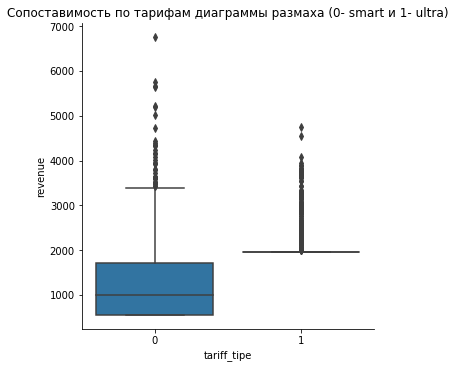

In [72]:
sns.catplot(x='tariff_tipe', #диаграмма размаха для оценки значения переменной с частотой ее появления; 0- smart и 1- ultra
            y='revenue',
            kind='box',
            data=total_users_tariffs)

plt.title('Сопоставимость по тарифам диаграммы размаха (0- smart и 1- ultra)')

#### Вывод:
Минуты разговора, объем потраченного интернет-трафика и число сообщений по тарифу "Ультра" имеют большую дисперсию и стандартное отклонение в сравнении с тарифом "Смарт", что закономерно- пользователи имеют значительно более широкий диапазон по всем позициям тарифа и значительно дальше от зоны риска внезапного окончания опций подключенного тарифного плана.
<br> Среднее по тарифам приближено к медиане, что соответствует распределению Гаусса, "подверженному влиянию независимых факторов, способных вносить с равной погрешностью положительные и отрицательные отклонения".
<br> Распределение по тарифу "Смарт" находится на уровне 987 рублей, по тарифу "Ультра"- 1950 рублей.
<br>По гистограммам тарифов четко прослежививаются тенденции современности (наличие бесплатных messengers, wi-fi)- пользователи с бОльшим количеством предоплаченных минут, трафика интернета, собщений используют их всего лишь на 50%.

### Шаг 4. Проверка гипотезы<a id='step11'></a>
<br>Пояснение:
<br>-формулировка нулевой и альтернативной гипотезы;
<br>-критерий для проверки гипотез и почему.

### 4.1.Гипотеза_1 <a id='step12'></a>
#### <br> Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

H0  — средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт".

H1  — средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются.

α=5%

Расчет results осуществлен методом scipy.stats.ttest_ind() с переданными параметрами array1, array2- массивами, содержащими выборки.
<br>Добавлен параметр метода проверки 'equal_var = False' исходя из оценки дисперсий выборок- дисперсии выборок из генеральных совокупностей неравны и целесообразно их оценивать каждую отдельно по значениям дисперсий в них.

In [73]:
alpha = 0.05
results = st.ttest_ind(smart['revenue'], ultra['revenue'], equal_var = False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value: 1.3962133482813833e-281
Отвергаем нулевую гипотезу


#### Вывод:
С уверенностью на 95% можно утвеждать, что тарифы "Ультра" и "Смарт" отличаются по выручке.
<br>p-value показывает значительную дальность между средним и значением для сравнения- нулевая гипотеза неверна.
<br>Данный факт подтверждается и  исходя из средней выручки "Ультра"- 2060 рублей и "Смарт"- 1251 рублей при стоимости тарифа за 1950 рублей и 550 рублей соответственно.
<br>Средние значения  выручки тарифов "Ультра" и "Смарт" различаются в 2 раза.
<br>Пользователи "Смарт" в среднем доплачивают сумму эквивалентную стоимости своего тарифа при израсходовании предоплаченных опций .
<br>Также есть момент неравномерности по выручке при сравнении этих выборок- пользователи с тарифом "Смарт" превалируют в выборке- их 70%.



### 4.2.Гипотеза_2<a id='step13'></a>
#### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

H0  — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

H1  — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

α=5%

In [74]:
other = total_users_tariffs[total_users_tariffs['city_tipe'] == 0]
moscow = total_users_tariffs[total_users_tariffs['city_tipe'] == 1]

In [75]:
other[['revenue']].describe().astype('int')

,revenue
count,2603
mean,1494
std,797
min,550
25%,705
50%,1545
75%,1950
max,6768


In [76]:
moscow[['revenue']].describe().astype('int')

,revenue
count,611
mean,1517
std,740
min,550
25%,766
50%,1733
75%,1950
max,5225


In [77]:
np.var_other=other.pivot_table(index='month',values=['revenue'],aggfunc=(np.var)).astype('int')
print(np.var_other)

       revenue
month         
1       317736
2       478989
3       493832
4       441287
5       527305
6       559043
7       614761
8       624899
9       503082
10      639695
11      612932
12      903836


In [78]:
np.var_moscow=moscow.pivot_table(index='month',values=['revenue'],aggfunc=(np.var)).astype('int')
print(np.var_moscow)

       revenue
month         
1       533892
2       491018
3       411994
4       474191
5       660921
6       474312
7       471102
8       395342
9       472407
10      585880
11      534192
12      800192


Аналогично предыдущей гипотезе для установления 'equal_var = False' посчитана дисперсия по 'other' и 'moscow'- она также показывает неравенство дисперсий выборок из генеральных совокупностей.

In [79]:
alpha = 0.05
results = st.ttest_ind(moscow['revenue'], other['revenue'], equal_var = False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.5026512166637858
Не получилось отвергнуть нулевую гипотезу


#### Вывод:
С уверенностью на 95% можно утвеждать, что тарифы "Ультра" и "Смарт" не отличаются по выручке в Москве и по регионам.
<br>p-value показывает значительную близость между средним и значением для сравнения- нулевая гипотеза верна.
<br>Данный факт подтверждается и исходя из средней выручки почти идентичной по Москве- 1517 рублей и по регионам - 1494 рублей соответственно.

### Шаг 5. Общий вывод <a id='step14'></a>

<br>Выручка от тарифа "Ультра" составила 2060 рублей, "Смарт"- 1251 рублей (p-value: 0 при α=5%).
<br>При условии, что 70% выборки тариф "Смарт" и тогда в совокупности именно он даст больший прирост по выручке (+42% от тарифа "Ультра").
<br>Пользователи тарифа "Ультра" не успевают использовать свои пакет предоплаченных опций по тарифу даже на 50%, а вот у тарифа "Смарт" стабильно есть доплаты от пользователей равные первоначальной сумме тарифа.
<br>Средние доходы от пользователей в Москве- 1517 рублей почти сходны с регионами- 1494 рублей (p-value: 0,5 при α=5%).
<br>Перспективнее для компании при таких показателях скорее выглядит тариф "Смарт".